Link pra o notebook: https://colab.research.google.com/drive/1rwBPIsrmSI7SYdCLIRdcjz626DVQWEd8?usp=sharing

# **Rodrigo_Mesquita_DR2_AT**
## **Dados para Machine Learning: Feature Engineering [24E1_2]**

##1. Escolha um dataset de regressão e aplique em uma característica uma técnica de discretização por meio de quantização com bins fixos. Aplique regressão linear utilizando apenas a característica que está trabalhando e calcule a métrica R2.


Documentação do Dataset "Medical Cost Personal", disponível em https://www.kaggle.com/datasets/mirichoi0218/insurance

* **age:** *Age of primary beneficiary*
* **sex:** *Insurance contractor gender, female, male*
* **bmi:** *Body mass index*
* **children:** *Number of children covered by health insurance / Number of dependents*
* **smoker:** *Smoking Y/N*
* **region:** *The beneficiary's residential area in the US, northeast, southeast, southwest, northwest.*
* **charges:** *Individual medical costs billed by health insurance*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
df_health = pd.read_csv('/content/drive/MyDrive/Faculdade/Colab Notebooks/Datasets/insurance.csv')

In [ ]:
df_health.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df_health.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
x = df_health['bmi']
y = df_health['charges']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [ ]:
print('Qtd valores distintos na coluna bmi:', x_train.nunique())

Qtd valores distintos na coluna bmi: 469


qtd valores distintos 248


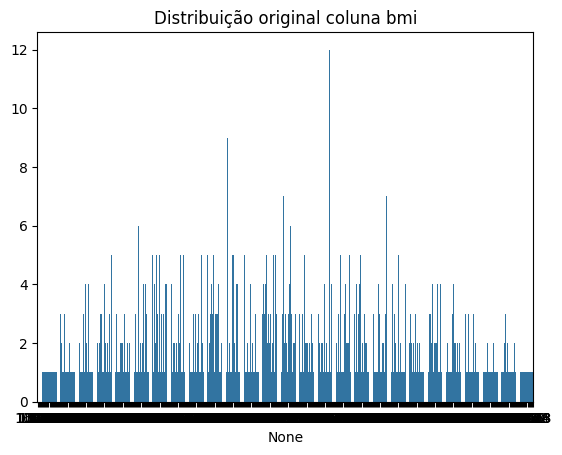

In [ ]:
counts = x_train.value_counts()
print('qtd valores distintos', len(counts[counts == 1]))

sns.barplot(x=counts.index, y=counts.values)
plt.title('Distribuição original coluna bmi')
plt.show()

In [ ]:
#Aplicando Discretização com Bin Fixo
kb = KBinsDiscretizer(n_bins=20, strategy = 'uniform', encode = 'ordinal')
x_train_binF = kb.fit_transform(x_train.values.reshape(-1, 1))

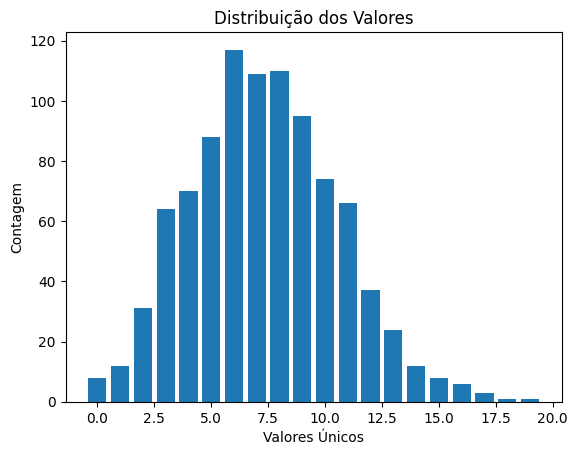

In [ ]:
unique_values, counts = np.unique(x_train_binF, return_counts=True)
plt.bar(unique_values, counts)
plt.title('Distribuição dos Valores')
plt.xlabel('Valores Únicos')
plt.ylabel('Contagem')
plt.show()

In [ ]:
#Treinar o modelo de Regressão
reg = LinearRegression()
reg.fit(x_train_binF,y_train.values.ravel())
y_pred = reg.predict(x_train_binF)

In [ ]:
# Calcular o R2 do modelo
print("Coeficiente R2:", r2_score(y_train, y_pred))

Coeficiente R2: 0.03696239059603046


##2. Utilizando o mesmo dataset , aplique em outra característica uma técnica de discretização por meio de quantização com bins variáveis. Aplique regressão linear utilizando apenas a característica que está trabalhando e calcule a métrica R2.


In [ ]:
#Aplicando Discretização com Bin Variável
kb = KBinsDiscretizer(n_bins=20, strategy = 'quantile', encode = 'ordinal')
x_train_binV = kb.fit_transform(x_train.values.reshape(-1, 1))

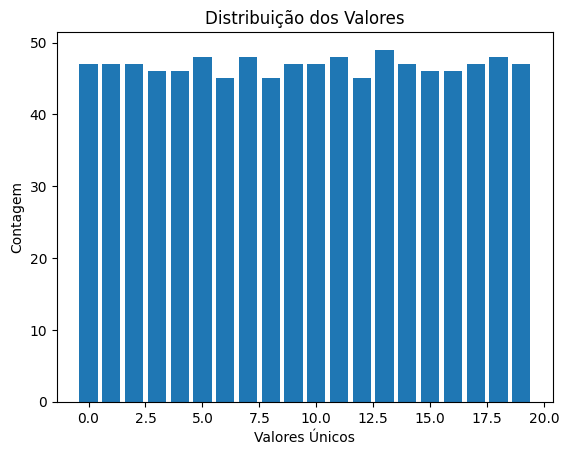

In [ ]:
unique_values, counts = np.unique(x_train_binV, return_counts=True)
plt.bar(unique_values, counts)
plt.title('Distribuição dos Valores')
plt.xlabel('Valores Únicos')
plt.ylabel('Contagem')
plt.show()

In [ ]:
#Treinar o modelo de Regressão
reg = LinearRegression()
reg.fit(x_train_binV,y_train.values.ravel())
y_pred = reg.predict(x_train_binV)

In [ ]:
# Calcular o R2 do modelo
print("Coeficiente R2:", r2_score(y_train, y_pred))

Coeficiente R2: 0.0409799139935233


##3. Utilizando um dataset de classificação, aplique em uma característica a técnica PowerTransform. Aplique a Regressão Logística e calcule a acurácia e F1 score utilizando validação cruzada.


In [ ]:
df_bet = pd.read_csv('/content/drive/MyDrive/Faculdade/Colab Notebooks/Datasets/diabetes.csv')

In [ ]:
df_bet.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df_bet.describe()

In [ ]:
x_train = df_bet.drop(columns='Outcome')
y_train = df_bet['Outcome']

In [ ]:
scaler = PowerTransformer(method='yeo-johnson')
x_train['Insulin'] = scaler.fit_transform(x_train[['Insulin']])

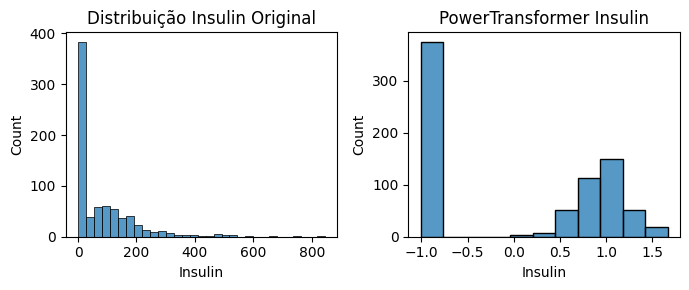

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(7, 3))
sns.histplot(df_bet,x='Insulin', ax=axs[0]).set_title('Distribuição Insulin Original')
sns.histplot(x_train,x='Insulin', ax=axs[1]).set_title('PowerTransformer Insulin')
plt.tight_layout()
plt.show()

In [ ]:
#Treinar o modelo de Regressão
lregression = LogisticRegression(max_iter=1000)
param_grid = {'C': [0.001, 0.1, 1.]}
grid = GridSearchCV(lregression, param_grid, cv=5)
grid.fit(x_train, y_train)
y_pred = grid.predict(x_train)

In [ ]:
#Calcular métricas
print('Acurácia', accuracy_score(y_train, y_pred))
print('F1 Score', f1_score(y_train, y_pred))

Acurácia 0.7825520833333334
F1 Score 0.649895178197065


##4. Utilizando o dataset de classificação escolhido, aplique MinMax scaler em uma característica e Standard Scaler e em seguida explique a diferença entre as duas técnicas.


In [ ]:
#Realizando as normalizações
x_train['Age_MinS'] = MinMaxScaler().fit_transform(x_train[['Age']])
x_train['Age_StdS'] = StandardScaler().fit_transform(x_train[['Age']])

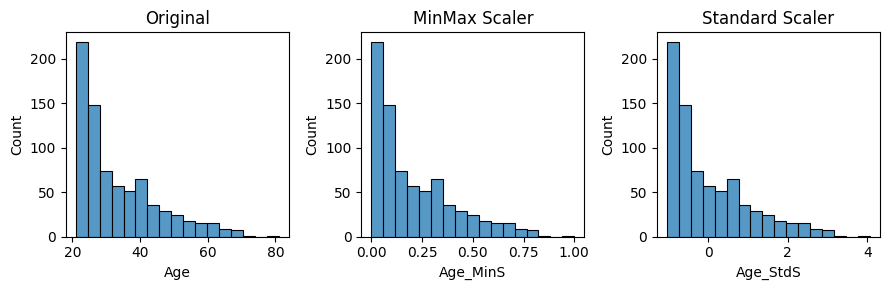

In [ ]:
#Exibindo Resultados
fig, axs = plt.subplots(1, 3, figsize=(9, 3))
sns.histplot(x_train,x='Age', ax=axs[0]).set_title('Original')
sns.histplot(x_train,x='Age_MinS', ax=axs[1]).set_title('MinMax Scaler')
sns.histplot(x_train,x='Age_StdS', ax=axs[2]).set_title('Standard Scaler')
plt.tight_layout()
plt.show()

O MinMax Scaler transforma o menor valor feature em 0 e o maior em 1, distribuindo os demais valores dentro desse intervalo, enquanto o Standart Scaler transforma a média em 0 e o desvio padrão em 1, distribuindo os demais valores de forma relativa a esses dois pontos.

##5. Como calculamos a norma-l2 em uma característica (mostre sua fórmula)? Para que essa técnica serve?


In [ ]:
normalizer = Normalizer()
normalizer.fit(df_bet['BMI'].values.reshape(1, -1))
result = normalizer.transform(df_bet['BMI'].values.reshape(1, -1))
df_bet['BMI_L2'] = result[0]

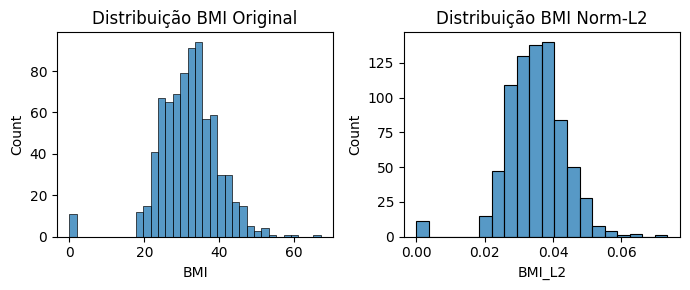

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(7, 3))
sns.histplot(df_bet,x='BMI', ax=axs[0]).set_title('Distribuição BMI Original')
sns.histplot(df_bet,x='BMI_L2', ax=axs[1], bins=20).set_title('Distribuição BMI Norm-L2')
plt.tight_layout()
plt.show()

Essa técnica é usada para ajustar a distribuição da Feature, aproximando de uma distribuição normal ao reduzir(penalizar) o peso dos extremos (menores e maiores valores).
Esta normalização ajuda a evitar o Overfitting e auxilia modelos sensíveis a outlier, devido a suavização que realiza na distribuição da feature.

##6. Utilize o dataset do IMDb visto em sala de aula e aplique a técnica de lemmatization junto com Bag-of-nGrams e escolha um tamanho de contexto, em seguida aplique TF-IDF e calcule a acurácia e F1 score utilizando validação cruzada.


In [ ]:
! wget -nc http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz -P data
! tar xzf data/aclImdb_v1.tar.gz --skip-old-files -C data
! rm -rf data/aclImdb/train/unsup

--2024-04-02 13:53:54--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘data/aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  2.03MB/s    in 18s     

2024-04-02 13:54:13 (4.34 MB/s) - ‘data/aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [ ]:
import sklearn as sk
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.datasets import load_files
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score

import pandas as pd
import numpy as np
import spacy

In [ ]:
# Separando os conjuntos de treino e teste, e as variáveis dependentes e independentes.
train = load_files('data/aclImdb/train')
x_train = train.data
y_train = train.target

test = load_files('data/aclImdb/test')
x_test = test.data
y_test = test.target

In [ ]:
#Juntando treino e teste pois será feita validação cruzada
X = np.concatenate([x_train, x_test])
Y = np.concatenate([y_train, y_test])

In [ ]:
#Retirando markup de quebra de linha
X = [doc.replace(b"<br />", b" ") for doc in X]

In [ ]:
y_ravel = pd.DataFrame(Y).values.ravel()

In [ ]:
#Aplicando o Leematization
en_lemma = spacy.load('en_core_web_sm')

def lemmatize_text(doc):
    doc_spacy = en_lemma(doc)
    lemmatized_text = [token.lemma_ for token in doc_spacy]
    return lemmatized_text

x_lem = pd.DataFrame(X)
x_lem[0] = x_lem[0].astype(str)
x_lem[0] = x_lem[0].apply(lemmatize_text)

In [ ]:
#Guardei o resultado para não precisar reprocessar caso o notebook reiniciasse
x_lem.to_csv('/content/drive/MyDrive/Faculdade/Colab Notebooks/Datasets/result_lemm_DR2_AT.csv', index=False)

In [ ]:
x_lem_doc = [' '.join(line) for line in x_lem[0]]

In [ ]:
#Criando um pipeline para aplicar o Tf-Idf, já passando como hiperparâmetro o ngrams
pipe = make_pipeline(TfidfVectorizer(ngram_range=(2, 3), min_df=5, stop_words='english'), LogisticRegression(max_iter=300))

param_grid = {'logisticregression__C': [0.001, 0.01, 0.1]}

grid = GridSearchCV(pipe, param_grid, cv=5);
grid.fit(x_lem_doc, y_ravel)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidfvectorizer',
                                        TfidfVectorizer(min_df=5,
                                                        ngram_range=(2, 3),
                                                        stop_words='english')),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=300))]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1]})

In [ ]:
# Calculando a acurácia e o f1_score
y_pred = cross_val_predict(grid.best_estimator_, x_lem_doc, y_ravel, cv=5)

print("Acurácia:", accuracy_score(y_ravel, y_pred))
print("F1 Score:", f1_score(y_ravel, y_pred))

Acurácia: 0.81488
F1 Score: 0.8263935779128216


##7. Utilize o dataset do IMDb visto em sala de aula e aplique a técnica de stemming junto com Bag-of-Words, em seguida aplique TF-IDF e calcule a acurácia e F1 score utilizando validação cruzada.


In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Aplicando o stemmer no corpus X já criado no exercício anterior.

en_lemma = spacy.load('en_core_web_sm')
stemmer = nltk.stem.PorterStemmer()

def stm(doc):
    doc_spacy = en_lemma(str(doc))
    return [stemmer.stem(token.norm_.lower()) for token in doc_spacy]

x_stmd = [stm(frase) for frase in X]

In [ ]:
#Guardei o resultado para não precisar reprocessar caso o notebook reiniciasse
x_stmd_df = pd.DataFrame(x_stmd)
x_stmd_df.to_csv('/content/drive/MyDrive/Faculdade/Colab Notebooks/Datasets/result_stmd_DR2_AT.csv', index=False)

In [ ]:
x_stmd_doc = [' '.join(word) for word in x_stmd]

In [ ]:
#Criando um pipeline para aplicar o Tf-Idf + bag-of-words
pipe = make_pipeline(TfidfVectorizer(min_df=5, stop_words='english'), LogisticRegression(max_iter=300))

param_grid = {'logisticregression__C': [0.001, 0.01, 0.1]}

grid = GridSearchCV(pipe, param_grid, cv=5);
grid.fit(x_stmd_doc, y_ravel)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidfvectorizer',
                                        TfidfVectorizer(min_df=5,
                                                        stop_words='english')),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=300))]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1]})

In [ ]:
# Calculando a acurácia e o f1_score
y_pred = cross_val_predict(grid.best_estimator_, x_lem_doc, y_ravel, cv=5)

print("Acurácia:", accuracy_score(y_ravel, y_pred))
print("F1 Score:", f1_score(y_ravel, y_pred))

Acurácia: 0.86382
F1 Score: 0.8680042648056605


##8. Utilizando o dataset Titanic, aplique a técnica One-Hot-Encoding, Dummy coding e Effect coding em todas as variáveis categóricas e verifique o desempenho das 3 técnicas separadamente.


In [ ]:
!pip install category_encoders

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import pandas as pd
from category_encoders.sum_coding import SumEncoder

In [ ]:
df_tit = pd.read_csv('/content/drive/MyDrive/Faculdade/Colab Notebooks/Datasets/Titanic-Dataset.csv')

In [ ]:
df_tit.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
X = df_tit.drop(['Survived', 'Name', 'Cabin'], axis=1)
Y = df_tit['Survived']

In [ ]:
#Tratando os dados nulos
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')
X['Age'] = mean_imputer.fit_transform(X['Age'].values.reshape(-1, 1))
X['Sex'] = freq_imputer.fit_transform(X['Sex'].values.reshape(-1, 1))
X['Embarked'] = freq_imputer.fit_transform(X['Embarked'].values.reshape(-1, 1))

##OneHot Coding

In [ ]:
#Aplicando o OneHotEncoder nas features categóricas
x_OneHot = X.copy()
Encoder = OneHotEncoder()
x_OneHot['Sex'] = Encoder.fit_transform(X[['Sex']]).toarray()
x_OneHot['Embarked'] = Encoder.fit_transform(X[['Embarked']]).toarray()
x_OneHot['Ticket'] = Encoder.fit_transform(X[['Ticket']]).toarray()

In [ ]:
#Treinando o modelo
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
param_grid = {'n_neighbors': [3,5,7]}
grid = GridSearchCV(knn, param_grid, cv=3)
grid.fit(x_OneHot, Y)
score_OneHot = grid.best_score_

##Dummy Coding

In [ ]:
#Aplicando o Dummy nas features categóricas
x_Dummy = X.copy()
Encoder = OneHotEncoder(drop='first')
x_Dummy['Sex'] = Encoder.fit_transform(X[['Sex']]).toarray()
x_Dummy['Embarked'] = Encoder.fit_transform(X[['Embarked']]).toarray()
x_Dummy['Ticket'] = Encoder.fit_transform(X[['Ticket']]).toarray()

In [ ]:
#Treinando o modelo
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
param_grid = {'n_neighbors': [3,5,7]}
grid = GridSearchCV(knn, param_grid, cv=3)
grid.fit(x_Dummy, Y)
score_Dummy = grid.best_score_

##Effect Coding

In [ ]:
#Aplicando o Effect Coding nas features categóricas
x_Effect = X.copy()
encoder =SumEncoder(cols=['Sex','Embarked','Ticket'])
x_Effect = encoder.fit_transform(x_Effect, Y)

In [ ]:
#Treinando o modelo
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
param_grid = {'n_neighbors': [3,5,7]}
grid = GridSearchCV(knn, param_grid, cv=3)
grid.fit(x_Effect, Y)
score_Effect = grid.best_score_

##Resultados

In [ ]:
print('Score usando OneHot Coding:', score_OneHot)
print('Score usando Dummy Coding:', score_Dummy)
print('Score usando Effect Coding:', score_Effect)

Score usando OneHot Coding: 0.5701459034792368
Score usando Dummy Coding: 0.5701459034792368
Score usando Effect Coding: 0.5701459034792368


##9. Utilize a função FunctionTransform para transformar BinCouting em uma função do sklearn e aplique a um dataset de sua escolha.


In [4]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_transformer
import pandas as pd

In [96]:
df = pd.read_csv('/content/drive/MyDrive/Faculdade/Colab Notebooks/Datasets/Penguins.csv')

In [97]:
mapeamento = {'Adelie': 1, 'Gentoo': 0, 'Chinstrap': 0}
df['Adelie'] = df['species'].map(mapeamento);

In [105]:
def BinCounting(datf, col, label):
  label_1 = pd.Series(datf[datf[label] > 0][col].value_counts(), name=label)
  label_0 = pd.Series(datf[datf[label] < 1][col].value_counts(), name='no_'+label)

  counts = pd.DataFrame([label_1, label_0]).T.fillna('0')
  counts['total_' + label] = counts[label].astype('int64') + counts['no_'+label].astype('int64')
  counts['Bin+'] = counts[label].astype('int64').divide(counts['total_'+label].astype('int64'))
  counts['Bin-'] = counts['no_' + label].astype('int64').divide(counts['total_'+label].astype('int64'))

  counts['Probs'] = (counts['Bin+']).divide(counts['Bin-'] + 1)

  bin_counts = counts.filter(items=['Bin+', 'Bin-', 'Probs'])

  return datf[col].map(lambda x: bin_counts['Probs'][x] if x in datf[col].values else np.NaN).to_frame()

In [119]:
func = FunctionTransformer(BinCounting, kw_args={'col': 'island', 'label': 'Adelie'})
transform = make_column_transformer((func, ['island','Adelie']))
df['island'] = transform.fit_transform(df)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,Adelie
0,Adelie,1.000000,39.1,18.7,181.0,3750.0,male,2007,1
1,Adelie,1.000000,39.5,17.4,186.0,3800.0,female,2007,1
2,Adelie,1.000000,40.3,18.0,195.0,3250.0,female,2007,1
3,Adelie,1.000000,NaN,NaN,NaN,NaN,NaN,2007,1
4,Adelie,1.000000,36.7,19.3,193.0,3450.0,female,2007,1
...,...,...,...,...,...,...,...,...,...
339,Chinstrap,0.291667,55.8,19.8,207.0,4000.0,male,2009,0
340,Chinstrap,0.291667,43.5,18.1,202.0,3400.0,female,2009,0
341,Chinstrap,0.291667,49.6,18.2,193.0,3775.0,male,2009,0
342,Chinstrap,0.291667,50.8,19.0,210.0,4100.0,male,2009,0


##10. Utilizando um dataset de sua escolha (Com exceção do dataset casas em boston Sklearn load_boston, que foi feito em sala de aula) utilize o algoritmos PCA, faça a análise de quantos PCs são suficientes para representar todas as características disponíveis no dataset.


In [155]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [126]:
df_bet = pd.read_csv('/content/drive/MyDrive/Faculdade/Colab Notebooks/Datasets/diabetes.csv')
X = df_bet.drop(columns='Outcome')
Y = df_bet['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

In [154]:
df_bet.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##Avaliação do modelo sem PCA

In [152]:
model = LogisticRegression(max_iter=300)
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print('SCORE:', score)

SCORE: 0.7755905511811023


##Avaliando PCA com 8 componentes (todas as Features)

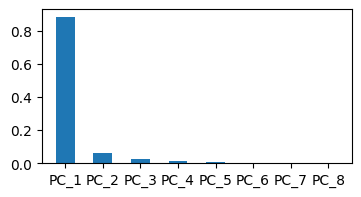

In [167]:
pca = PCA(n_components=8)
pca.fit(X_train)

PCs = ['PC_'+str(i) for i in range(1, 9)]

plt.figure(figsize=(4,2))
plt.bar(PCs, pca.explained_variance_ratio_, width = .5)
plt.show()

In [166]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

model = LogisticRegression()
model.fit(X_train_pca, y_train)

score_PCA8 = model.score(X_test_pca, y_test)
print('SCORE:', score_PCA8)

SCORE: 0.7755905511811023


##Avaliando PCA com os 2 principais componentes

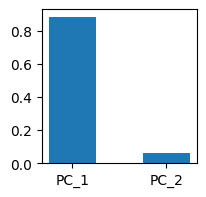

In [169]:
pca = PCA(n_components=2)
pca.fit(X_train)

PCs = ['PC_'+str(i) for i in range(1,3)]

plt.figure(figsize=(2,2))
plt.bar(PCs, pca.explained_variance_ratio_, width = .5)
plt.show()

In [171]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

model = LogisticRegression()
model.fit(X_train_pca, y_train)

score_PCA2 = model.score(X_test_pca, y_test)
print('SCORE:', score_PCA2)

SCORE: 0.7637795275590551


##Comparativo dos testes

In [172]:
print('Score Original:', score)
print('Score PCA=8:', score_PCA8)
print('Score PCA=2:', score_PCA2)

Score Original: 0.7755905511811023
Score PCA=8: 0.7755905511811023
Score PCA=2: 0.7637795275590551


##11. Explique o funcionamento do PCA conforme visto em sala de aula. Explique quem são os autovalores e autovetores dos PCs.

É uma técnica utilizada para reduzir a dimensionalidade (quantidade de Features) dos Datasets, criando um novo conjunto de componentes, elencados de acordo com sua capacidade de explicar a variância dos dados. Desta forma é possível selecionar somente os componentes principais, que tem maior peso, otimizando a performance do modelo.

*   **AutoValores**: Valores relativos a cada componente, que indicam o quanto são capazes de explicar a variância dos dados.
*   **AutoVetores**: Vetores que representam as direções dos eixos nos quais os dados originais possuem maior variância.